In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [2]:
weather_df = pd.read_csv(r'C:\Users\kambl\Documents\nagpur.csv\nagpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,14,0,48,0.0,1013,14,10,15,6
2009-01-01 01:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,16,0,48,0.0,1014,14,10,21,8
2009-01-01 02:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,16,19,0,48,0.0,1014,14,10,27,9
2009-01-01 03:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,15,21,0,49,0.0,1015,14,10,32,10
2009-01-01 04:00:00,30,14,0.0,8.7,5,1,31,09:57 AM,09:53 PM,06:51 AM,...,17,18,0,47,0.0,1015,15,10,34,10


In [3]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [4]:
weather_df.shape

(96432, 24)

In [5]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000
mean,33.630413,22.843703,0.0,10.816675,6.844948,4.459993,46.094077,13.202101,29.618716,29.736737,28.566824,13.959837,21.989340,47.144921,0.085174,1008.250436,27.73962,9.675657,182.866974,9.137444
std,5.521564,5.731620,0.0,1.961506,1.261332,3.348784,31.249725,8.135292,7.073535,6.949925,6.708836,6.856452,27.103733,26.377678,0.517264,5.710124,6.82792,1.502876,104.782482,4.597705
min,20.000000,8.000000,0.0,4.100000,4.000000,1.000000,0.000000,-16.000000,9.000000,10.000000,9.000000,0.000000,0.000000,3.000000,0.000000,992.000000,0.00000,0.000000,0.000000,0.000000
25%,30.000000,18.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,25.000000,25.000000,24.000000,9.000000,1.000000,24.000000,0.000000,1003.000000,23.00000,10.000000,77.000000,6.000000
50%,32.000000,23.000000,0.0,11.600000,7.000000,6.000000,46.000000,13.000000,29.000000,29.000000,28.000000,13.000000,9.000000,43.000000,0.000000,1008.000000,27.00000,10.000000,205.000000,8.000000
75%,38.000000,26.000000,0.0,12.800000,8.000000,7.000000,73.000000,22.000000,34.000000,34.000000,33.000000,18.000000,36.000000,70.000000,0.000000,1013.000000,32.00000,10.000000,275.000000,12.000000
max,49.000000,39.000000,0.0,13.600000,10.000000,11.000000,100.000000,29.000000,60.000000,60.000000,52.000000,63.000000,100.000000,100.000000,30.600000,1022.000000,49.00000,20.000000,360.000000,38.000000


In [6]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [7]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,30,14,0,48,14,8.7,17,0.0,1013,6
2009-01-01 01:00:00,30,14,0,48,14,8.7,17,0.0,1014,8
2009-01-01 02:00:00,30,14,0,48,14,8.7,16,0.0,1014,9
2009-01-01 03:00:00,30,14,0,49,14,8.7,15,0.0,1015,10
2009-01-01 04:00:00,30,14,0,47,15,8.7,17,0.0,1015,10


In [8]:
weather_df_num.shape

(96432, 10)

In [9]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

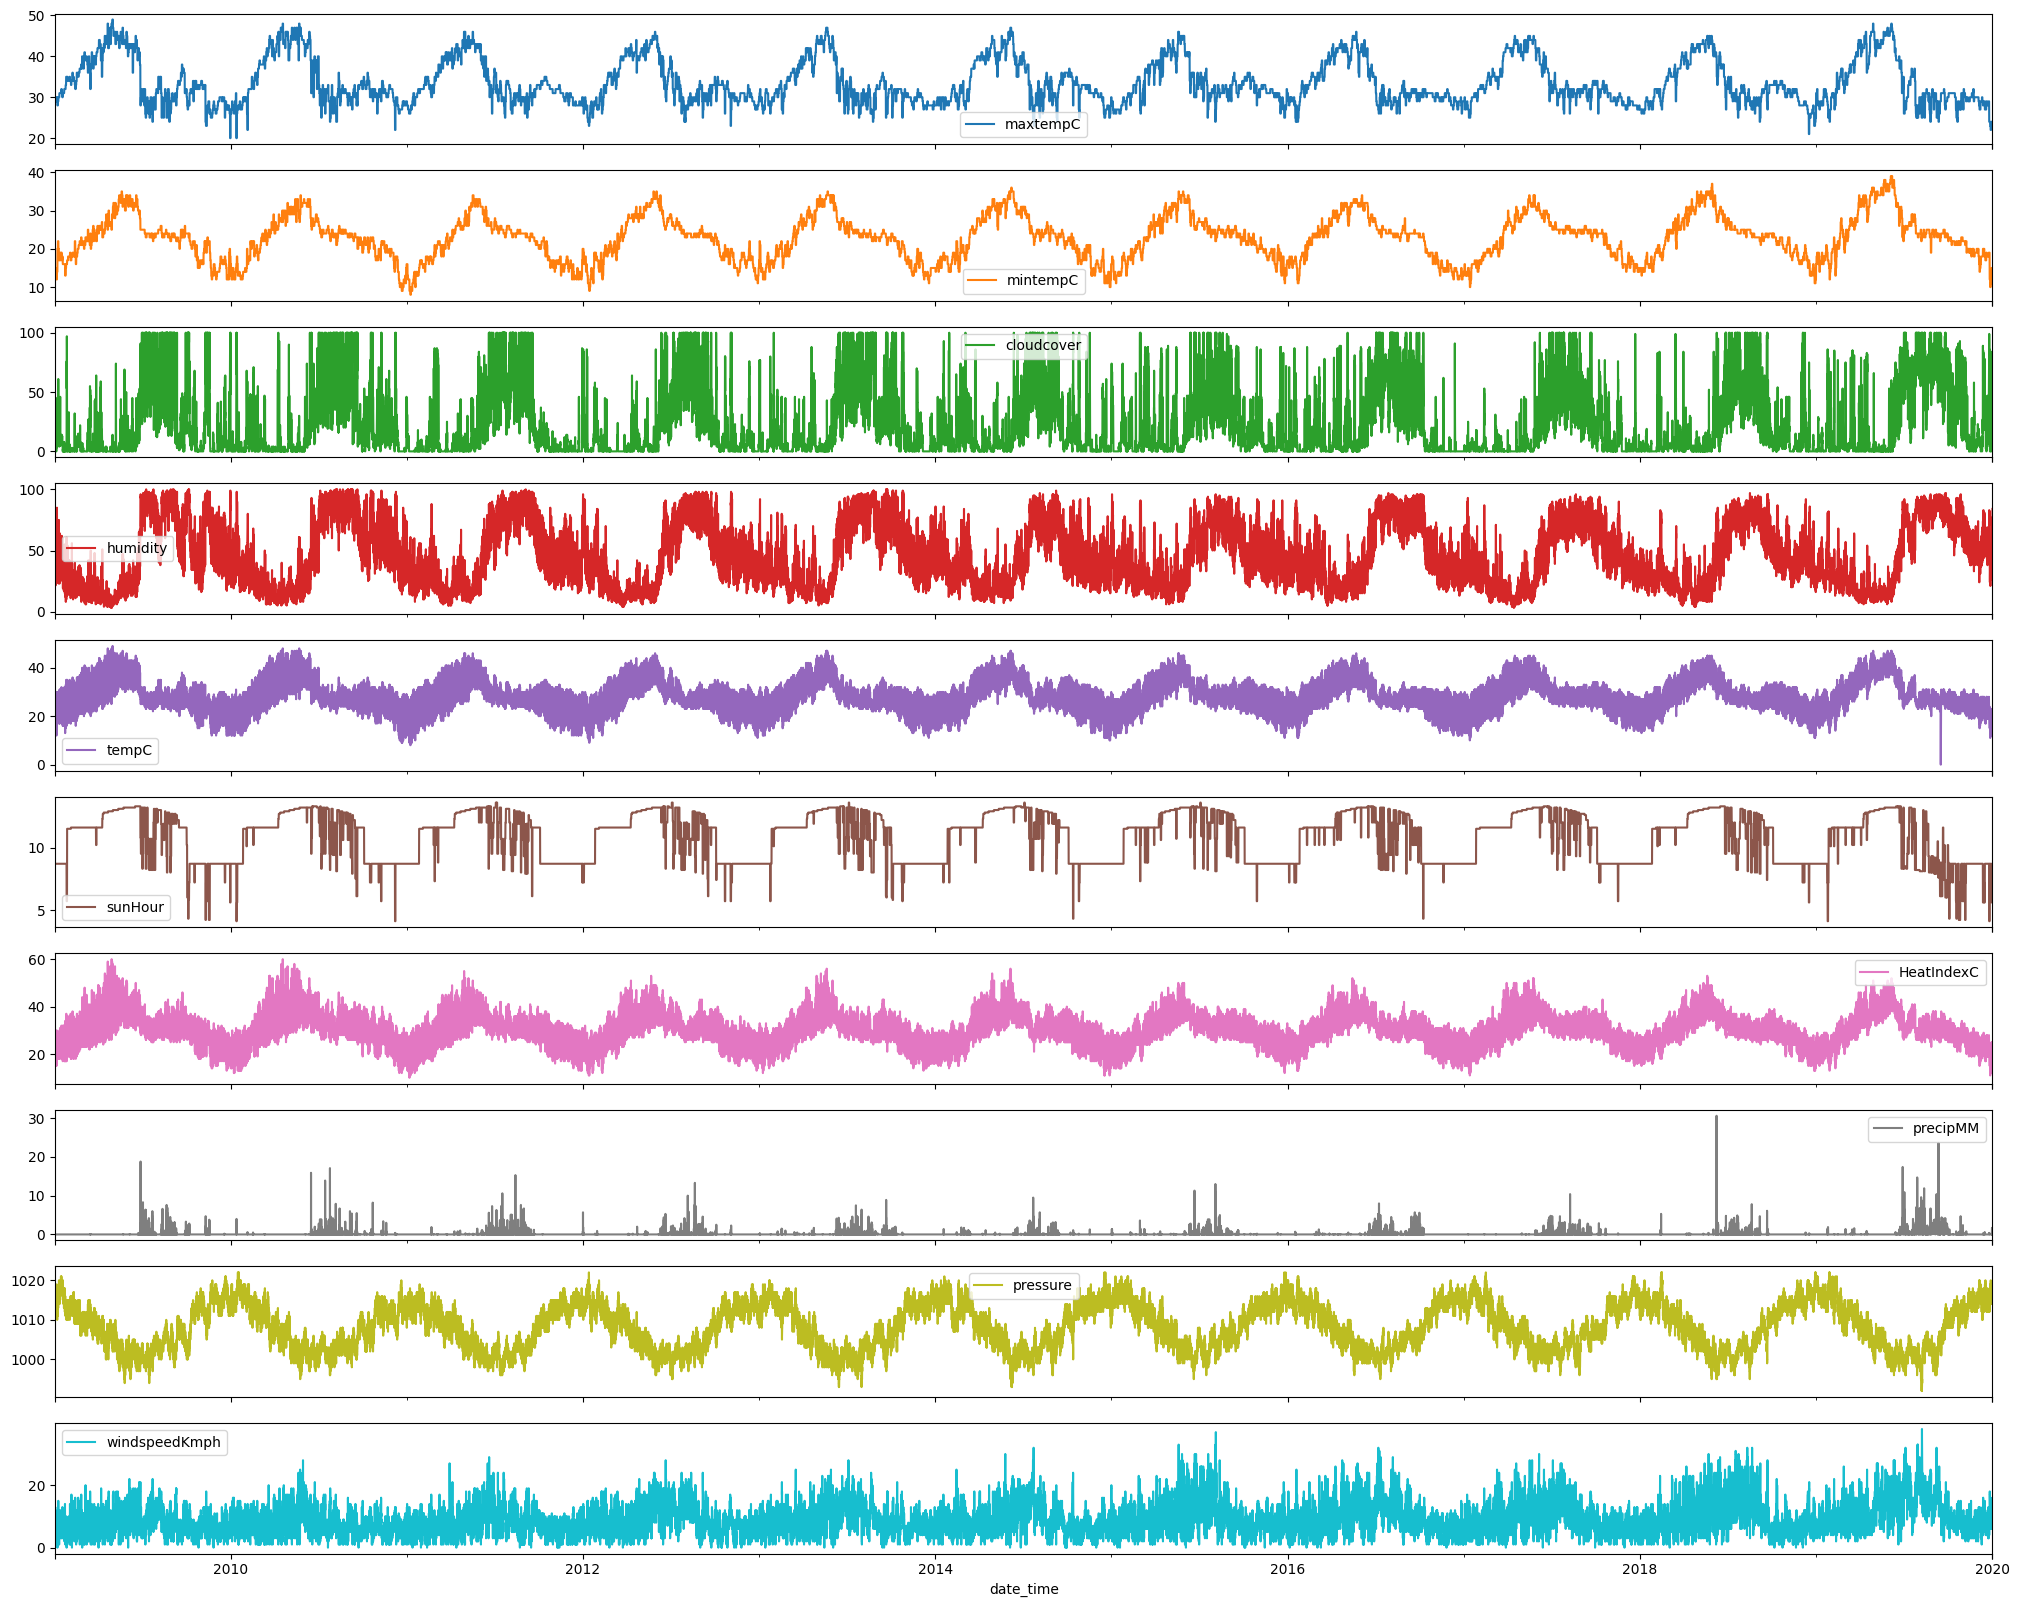

In [10]:
weather_df_num.plot(subplots=True, figsize=(25,20))

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

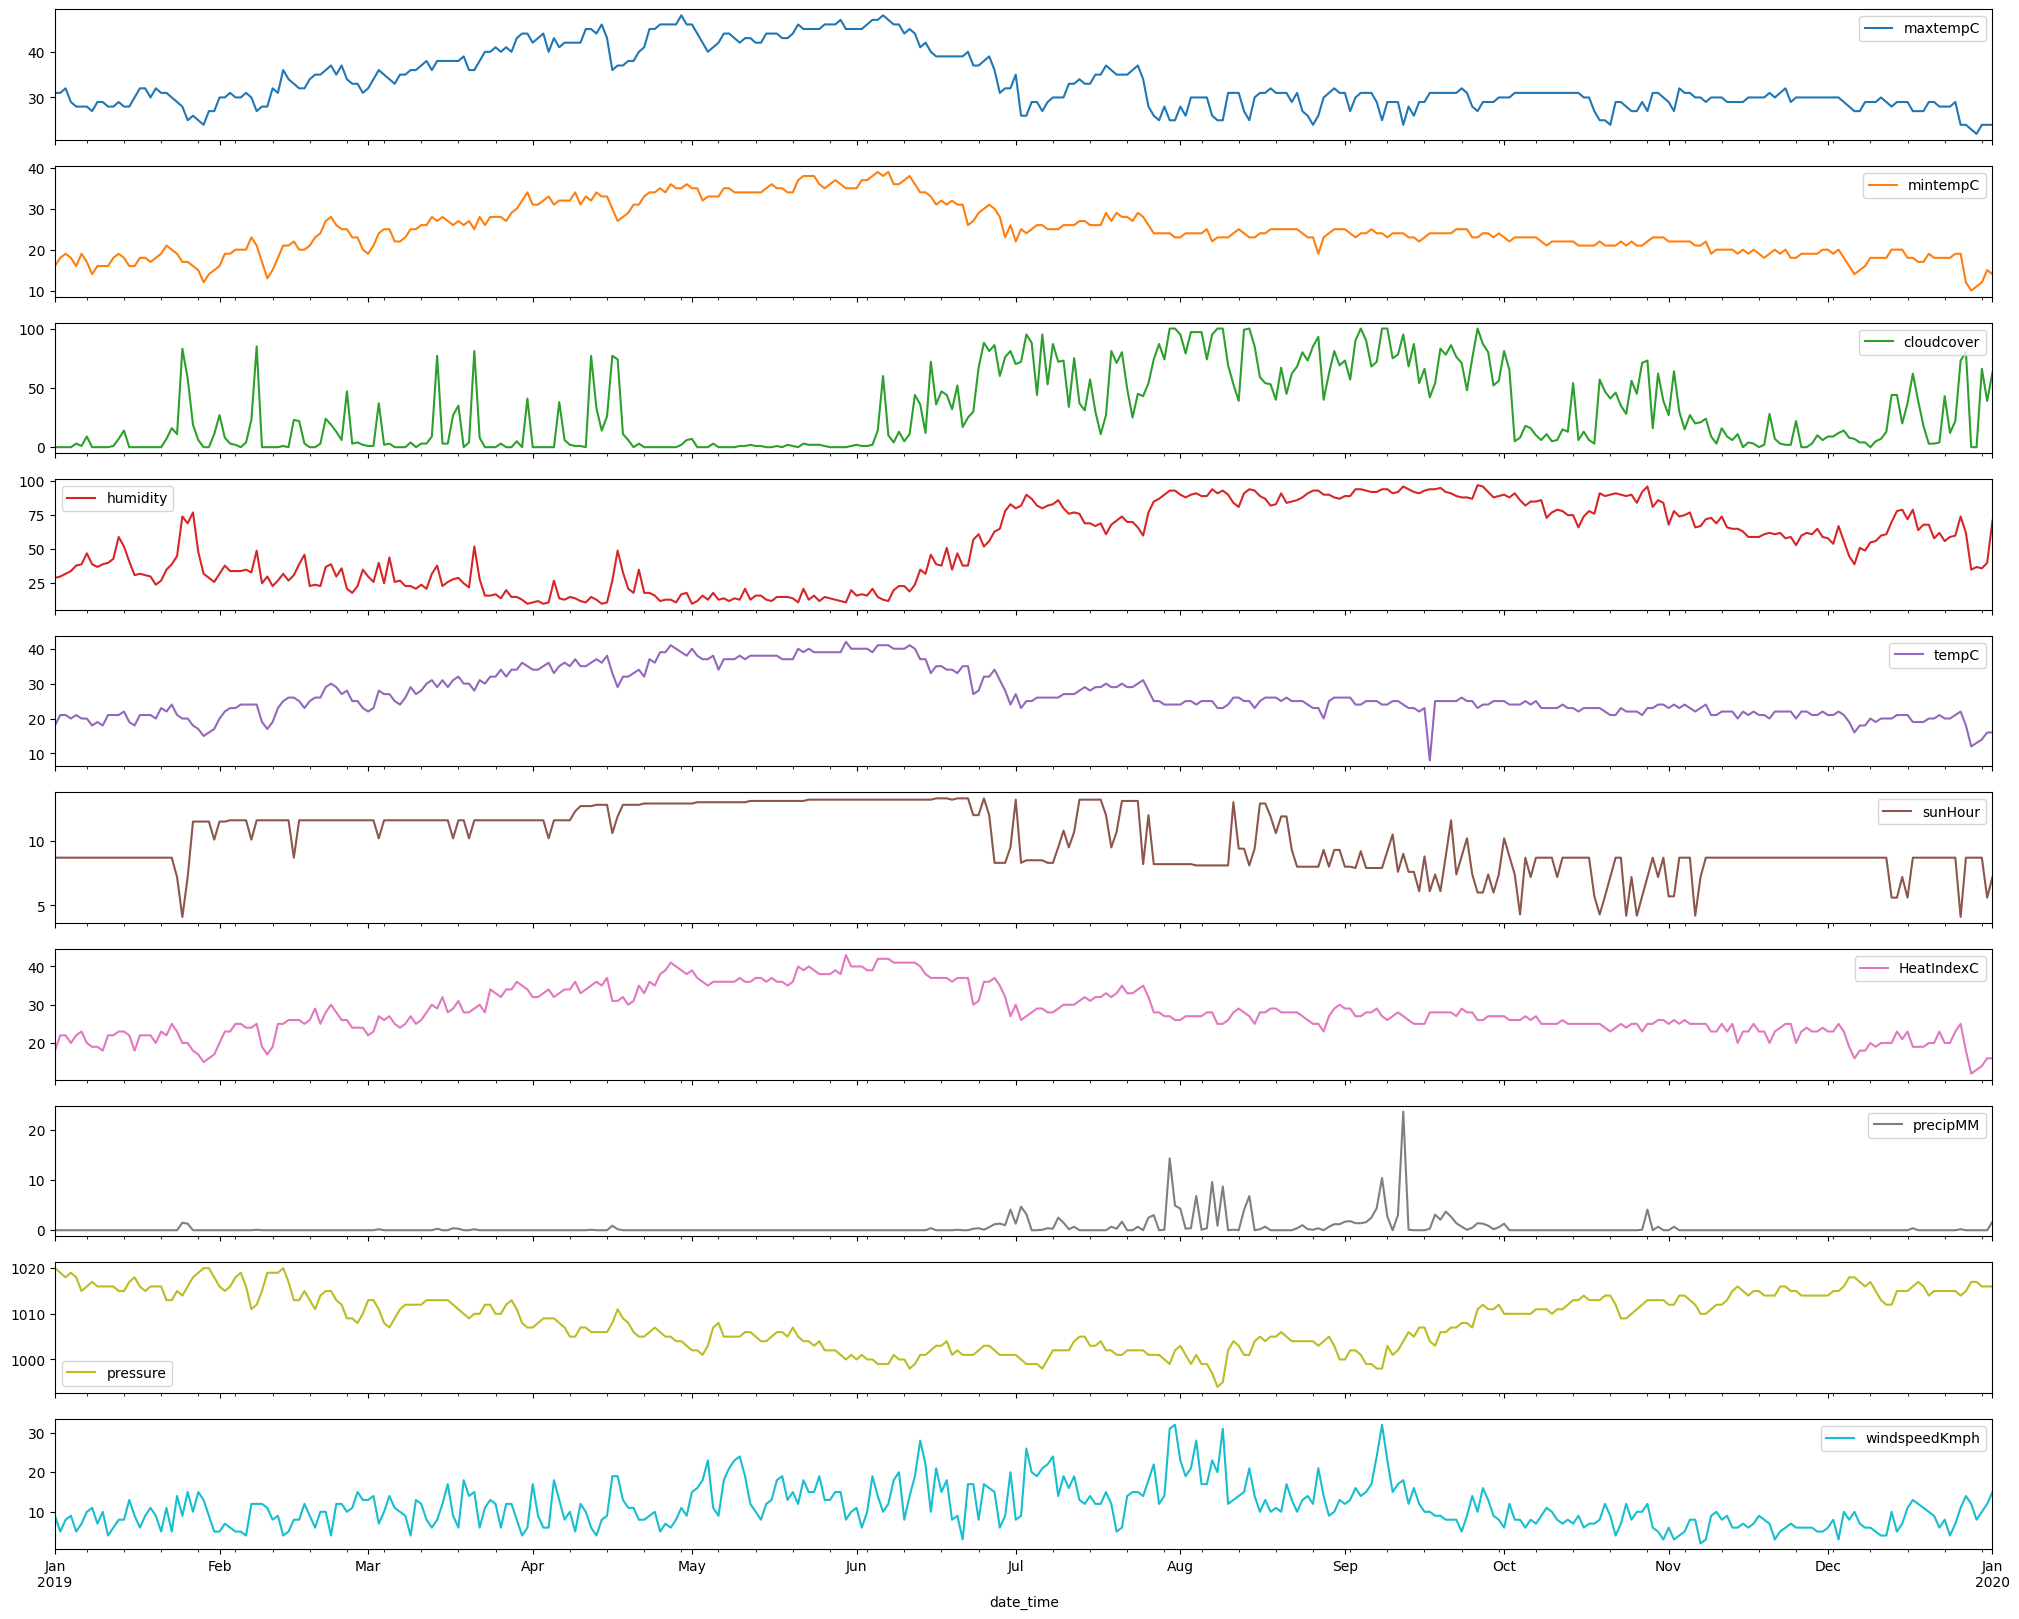

In [11]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

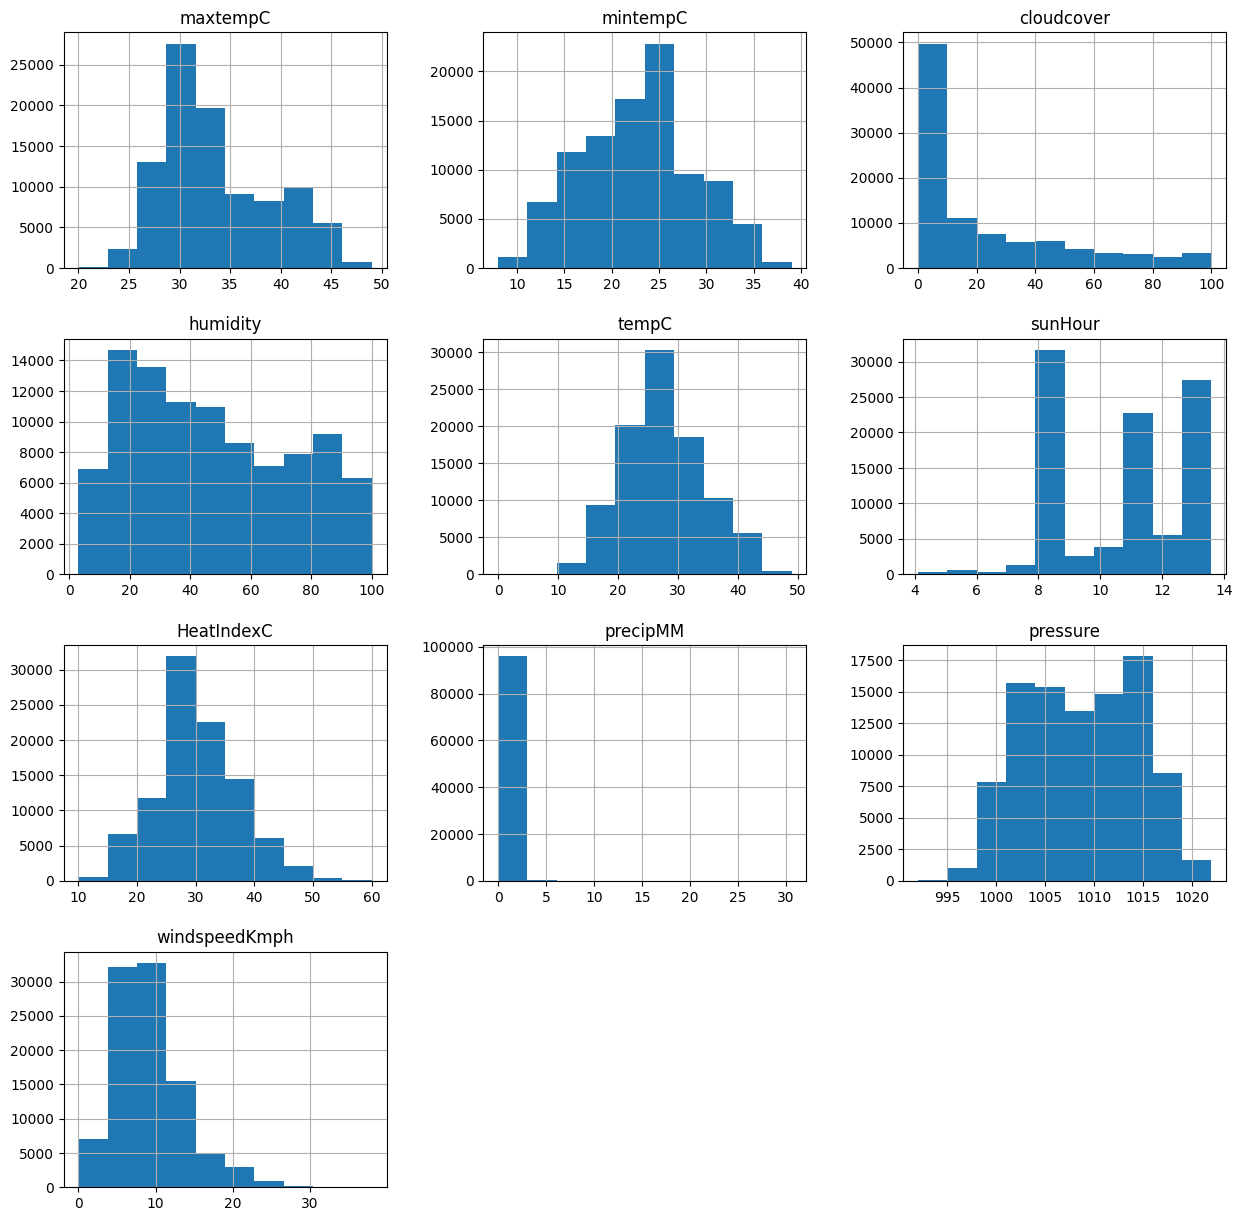

In [12]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [13]:
weth=weather_df_num['2019':'2020']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2019-01-01 00:00:00,31,16,0,29,18,8.7,18,0.0,1020,9
2019-01-01 01:00:00,31,16,0,29,18,8.7,18,0.0,1020,8
2019-01-01 02:00:00,31,16,0,30,17,8.7,17,0.0,1020,8
2019-01-01 03:00:00,31,16,0,31,17,8.7,17,0.0,1020,8
2019-01-01 04:00:00,31,16,0,32,17,8.7,17,0.0,1020,8


In [14]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

In [15]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [16]:
train_X.shape

(77145, 9)

In [17]:
train_y.shape

(77145,)

In [18]:
train_y.head()

date_time
2012-03-13 07:00:00    29
2009-11-05 21:00:00    22
2017-10-11 22:00:00    25
2019-06-08 11:00:00    44
2019-03-06 05:00:00    23
Name: tempC, dtype: int64

# Multiple Linear Regression

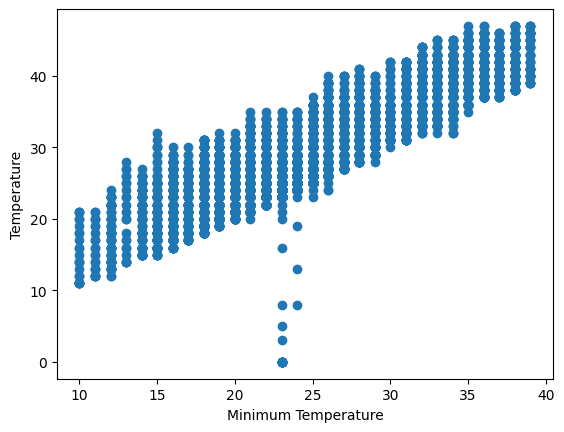

In [20]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

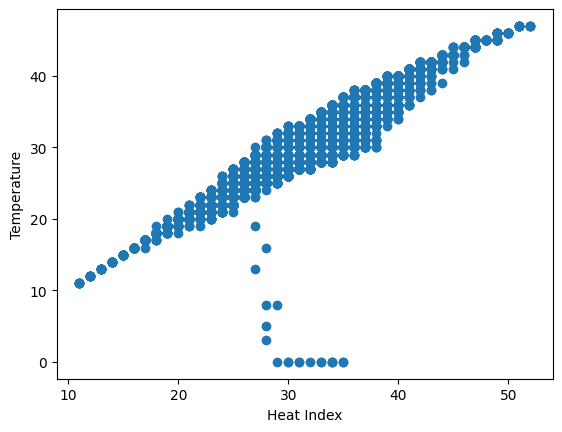

In [21]:
plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

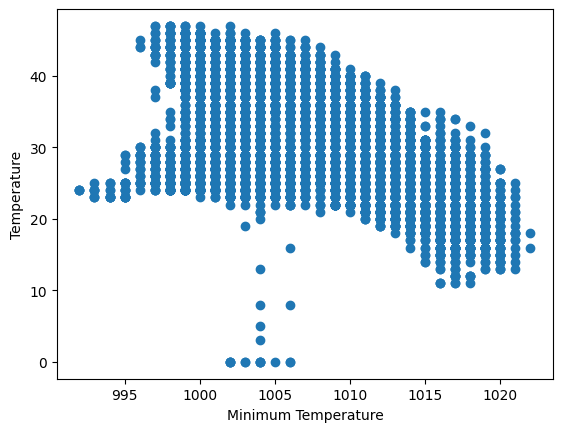

In [22]:
plt.scatter(weth.pressure, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

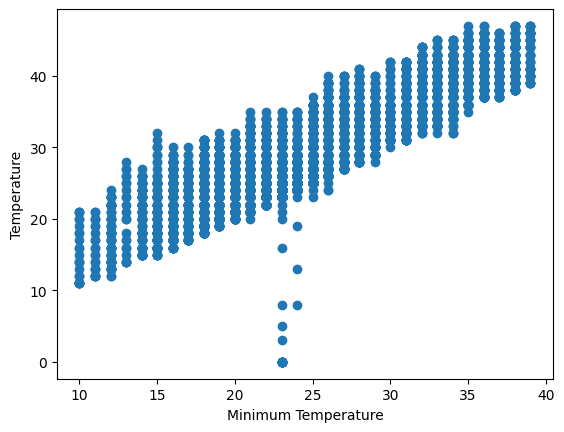

In [23]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

In [24]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [25]:
prediction = model.predict(test_X)

In [26]:
#calculating error
np.mean(np.absolute(prediction-test_y))

0.9359419860463861

In [27]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.97


In [28]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,28,28.13,-0.13
2015-11-04 20:00:00,23,23.57,-0.57
2015-09-21 09:00:00,30,30.32,-0.32
2017-02-16 11:00:00,32,29.94,2.06
2012-07-21 01:00:00,27,27.22,-0.22
...,...,...,...
2019-03-30 09:00:00,38,37.18,0.82
2015-11-12 12:00:00,33,30.26,2.74
2019-12-31 05:00:00,16,17.22,-1.22


# Decision Tree Regression 

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [30]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

0.4310761998582811

In [31]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.99


In [32]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,28,28.0,0.0
2015-11-04 20:00:00,23,23.0,0.0
2015-09-21 09:00:00,30,29.0,1.0
2017-02-16 11:00:00,32,30.0,2.0
2012-07-21 01:00:00,27,27.0,0.0
...,...,...,...
2019-03-30 09:00:00,38,36.0,2.0
2015-11-12 12:00:00,33,33.0,0.0
2019-12-31 05:00:00,16,16.0,0.0


# Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [34]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

0.3821888228027597

In [35]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [36]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,28,28.00,0.00
2015-11-04 20:00:00,23,22.43,0.57
2015-09-21 09:00:00,30,30.08,-0.08
2017-02-16 11:00:00,32,30.69,1.31
2012-07-21 01:00:00,27,27.00,0.00
...,...,...,...
2019-03-30 09:00:00,38,36.66,1.34
2015-11-12 12:00:00,33,32.48,0.52
2019-12-31 05:00:00,16,15.94,0.06


In [37]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [38]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 0.94
Residual sum of squares (MSE): 1.60
R2-score: 0.97


# Calculating R2-score for Decision Tree Regression

In [39]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.43
Residual sum of squares (MSE): 0.70
R2-score: 0.99


# Calculating R2-score for Random Forest Regression

In [40]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.38
Residual sum of squares (MSE): 0.44
R2-score: 0.99


# Calculating R2-score for Random Forest Regression

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate mean absolute error
mae_gb = mean_absolute_error(test_y, prediction_gb)
print("Mean Absolute Error: %.2f" % mae_gb)

# Calculate mean squared error
mse_gb = mean_squared_error(test_y, prediction_gb)
print("Residual Sum of Squares (MSE): %.2f" % mse_gb)

# Calculate R-squared (Variance score)
r2_gb = r2_score(test_y, prediction_gb)
print("R2-score (Variance score): %.2f" % r2_gb)


Mean Absolute Error: 0.47
Residual Sum of Squares (MSE): 0.60
R2-score (Variance score): 0.99


# Gradient Boosting Regression

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

In [42]:
gb_regressor = GradientBoostingRegressor(random_state=0)

In [43]:
gb_regressor.fit(train_X, train_y)

GradientBoostingRegressor(random_state=0)

In [44]:
prediction_gb = gb_regressor.predict(test_X)

In [45]:
mae_gb = mean_absolute_error(test_y, prediction_gb)
print('Mean Absolute Error: %.2f' % mae_gb)

Mean Absolute Error: 0.47


In [46]:
r2_gb = r2_score(test_y, prediction_gb)
print('Variance score (R-squared): %.2f' % r2_gb)

Variance score (R-squared): 0.99


In [47]:
prediction_gb = np.round(prediction_gb, 2)

In [48]:
comparison_df = pd.DataFrame({'Actual': test_y, 'Prediction': prediction_gb, 'Difference': (test_y - prediction_gb)})

# Display the DataFrame
print(comparison_df)

                     Actual  Prediction  Difference
date_time                                          
2013-07-10 08:00:00      28       27.87        0.13
2015-11-04 20:00:00      23       22.70        0.30
2015-09-21 09:00:00      30       30.22       -0.22
2017-02-16 11:00:00      32       31.26        0.74
2012-07-21 01:00:00      27       27.12       -0.12
...                     ...         ...         ...
2019-03-30 09:00:00      38       36.81        1.19
2015-11-12 12:00:00      33       32.46        0.54
2019-12-31 05:00:00      16       16.20       -0.20
2019-08-02 17:00:00      26       25.88        0.12
2019-10-22 08:00:00      24       24.10       -0.10

[19287 rows x 3 columns]
